$$

l_{1} : 剛体1の長さ\\

l_{2} : 剛体2の長さ\\

a_{1} = \frac{l_{1}}{2} : 剛体1の重心までの距離\\

a_{2} = \frac{l_{2}}{2} : 剛体2の重心までの距離\\

m_{1} : 剛体1の質量\\

m_{2} : 剛体2の質量\\

I_{1} = \frac{1}{12}m_{1}l^{2}_{1} : 剛体1の重心周りの慣性モーメント\\

I_{2} = \frac{1}{12}m_{2}l^{2}_{2} : 剛体2の重心周りの慣性モーメント\\


$$

$$
\frac{d\omega_{1}}{dt} = \frac{
  -m_{2}l_{1} a_{2} S I_{22} \omega^{2}_{2} - m^{2}_{2} l^{2}_{1} a^{2}_{2} C S \omega^{2}_{1} - (m_{1} a_{1} + m_{2} l_{1}) g \sin(\theta_{1}) I_{22} + m^{2}_{2} g l_{1}a^{2}_{2} C \sin(\theta_{2})
}{I_{12}I_{22} - m^{2}_{2}l^{2}a^{2}_{2}C^{2}}
\\
\frac{d\omega_{2}}{dt} = \frac{
  -m_{2}l^{2}_{1} a^{2}_{2} C S \omega^{2}_{2} - I_{12} m_{2} l_{1} a_{2} S \omega^{2}_{1} - (m_{1} a_{1} + m_{2} l_{1}) m_{2} l_{1} a_{2} g \sin(\theta_{1}) C + I_{12} m_{2} g a_{2} \sin(\theta_{2})
}{m^{2}_{2}l^{2}a^{2}_{2}C^{2} - I_{12}I_{22}}
\\
\frac{d\theta_{1}}{dt} =\omega_{1}\\
\frac{d\theta_{2}}{dt} =\omega_{2}\\
$$

$$
S = \sin(\theta_{1} - \theta_{2})\\
C = \cos (\theta_{1} - \theta_{2})\\
I_{12} = I_{1} + m_{1}a^{2}_{1} + m_{2}l^{2}_{1}\\
I_{22} = I_{2} + m_{2}a^{2}_{2}
$$

In [17]:
import scipy.integrate as RK45
import numpy as np

g = 9.81

omega1_0 = 0
omega2_0 = 0

theta1_0 = np.pi*2 / 3
theta2_0 = np.pi*2 / 3

l1 = 0.5
l2 = 0.5

a1 = l1 / 2
a2 = l2 / 2

m1 = 1
m2 = 1

I1 = m1 * l1**2 / 12
I2 = m2 * l2**2 / 12
I12 = I1 + m1 * a1**2 + m2 * l1**2
I22 = I2 + m2 * a2**2

t_0 = 0
t_max = 20
t_sample = 500

init = np.array([omega1_0, omega2_0, theta1_0, theta2_0])
t_span = (t_0, t_max)
t_eval = np.linspace(t_0, t_max, t_sample)


def func(t, Y):
    (omega1, omega2, theta1, theta2) = Y

    def omega1_dot(t, omega1, omega2, theta1, theta2):
        s1 = -m2 * l1 * a2 * np.sin(theta1 - theta2) * I22 * omega2**2
        s2 = (
            -(m2**2)
            * l1**2
            * a2**2
            * np.sin(theta1 - theta2)
            * np.cos(theta1 - theta2)
            * omega1**2
        )
        s3 = -(m1 * a1 + m2 * l1) * g * np.sin(theta1) * I22
        s4 = m2**2 * g * l1 * a2**2 * np.cos(theta1 - theta2) * np.sin(theta2)

        s5 = I12 * I22 - m2**2 * l1**2 * a2**2 * np.cos(theta1 - theta2) ** 2

        return (s1 + s2 + s3 + s4) / s5

    def omega2_dot(t, omega1, omega2, theta1, theta2):
        s1 = (
            -m2
            * l1**2
            * a2**2
            * np.cos(theta1 - theta2)
            * np.sin(theta1 - theta2)
            * omega2**2
        )
        s2 = -I12 * m2 * l1 * a2 * np.sin(theta1 - theta2) * omega1**2
        s3 = (
            -(m1 * a1 + m2 * l1)
            * m2
            * l1
            * a2
            * g
            * np.sin(theta1)
            * np.cos(theta1 - theta2)
        )
        s4 = I12 * m2 * g * a2 * np.sin(theta2)
        s5 = m2**2 * l1**2 * a2**2 * np.cos(theta1 - theta2) ** 2 - I12 * I22
        return (s1 + s2 + s3 + s4) / s5

    def theta1_dot(t, omega1, omega2, theta1, theta2):
        return omega1

    def theta2_dot(t, omega1, omega2, theta1, theta2):
        return omega2

    return np.array(
        [
            omega1_dot(t, omega1, omega2, theta1, theta2),
            omega2_dot(t, omega1, omega2, theta1, theta2),
            theta1_dot(t, omega1, omega2, theta1, theta2),
            theta2_dot(t, omega1, omega2, theta1, theta2),
        ]
    )


sol = RK45.solve_ivp(func, t_span, init, t_eval=t_eval)

theta1_list = sol.y[2]
theta2_list = sol.y[3]

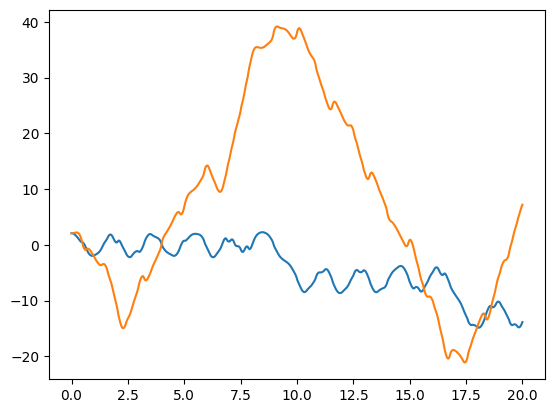

In [18]:
from matplotlib import pyplot as plt
from random import randint

# データの定義(サンプルなのでテキトー)

# グラフの描画
plt.plot(t_eval, theta1_list)
plt.plot(t_eval, theta2_list)
plt.show()